In [2]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt    
from dataHack import removeColl 
%matplotlib inline
import warnings
import scipy
warnings.filterwarnings('ignore')
import networkx as nx
%load_ext autotime
def printmd(string):
    display(Markdown(string))
import plotly.offline as py1
py1.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import plotly
import plotly.plotly as py
from plotly.tools import FigureFactory as ff
plotly.tools.set_credentials_file(username='sushant.bharti', api_key='WptZURbEo6AnBZpSHNgO')
plt.style.use('seaborn-bright')
pal = sns.color_palette()

In [3]:
df_train = pd.read_csv('../quora pairs/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


time: 1.44 s


In [4]:
print df_train.info()
print '\n\nId :',df_train.id.nunique(),'\nQid :',df_train.qid1.nunique(),'\n\nDuplicate\n',df_train.is_duplicate.value_counts()
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
None


Id : 404290 
Qid : 290654 

Duplicate
0    255027
1    149263
Name: is_duplicate, dtype: int64
Duplicate pairs: 36.92%
time: 191 ms


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780
()


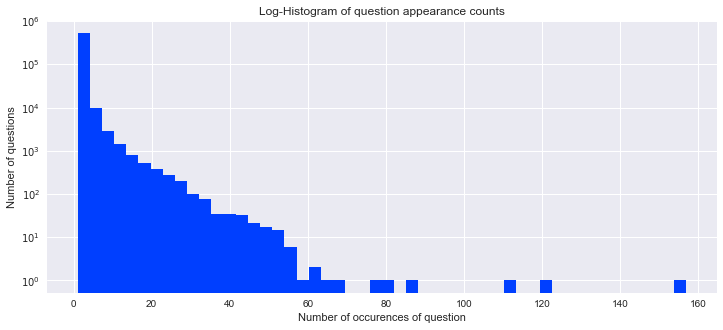

time: 2.85 s


In [5]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [6]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
printmd('### Predicted score:'+ str( log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p)))

df_test = pd.read_csv('test.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})


### Predicted score:0.658527383984

time: 13.5 s


In [7]:
print df_test.info()
print '\n\nId :',df_test.test_id.nunique(),'\nQid :',df_test.question1.nunique()#,'\n\nDuplicate\n',df_test.is_duplicate.value_counts()
#print('Duplicate pairs: {}%'.format(round(df_test['is_duplicate'].mean()*100, 2)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB
None


Id : 2345796 
Qid : 2211008
time: 1.3 s


In [8]:
printmd('#### LB score 0.55 ')

#### LB score 0.55 

time: 6 ms


In [9]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796
time: 141 ms


# Characters per question

mean-train 59.86 std-train 31.99 mean-test 60.11 std-test 31.66 max-train 1169.00 max-test 1176.00


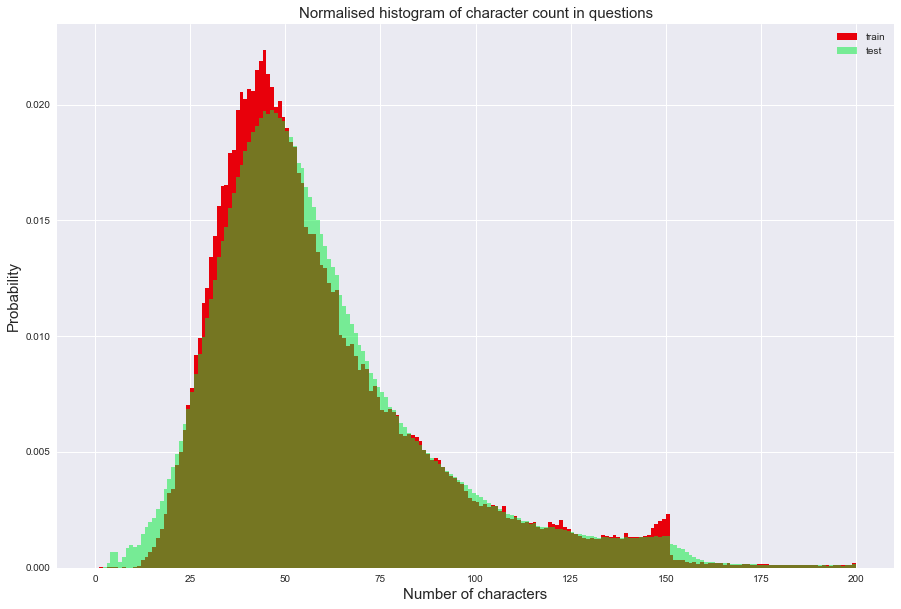

time: 7.26 s


In [10]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
printmd('# Characters per question')
print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [11]:
print len(dist_train)
dist_train.head()

808580


0    66
1    51
2    73
3    50
4    76
dtype: int64

time: 4 ms


In [12]:
print len(train_qs)
train_qs.head()

808580


0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

time: 368 ms


# Words per Question

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


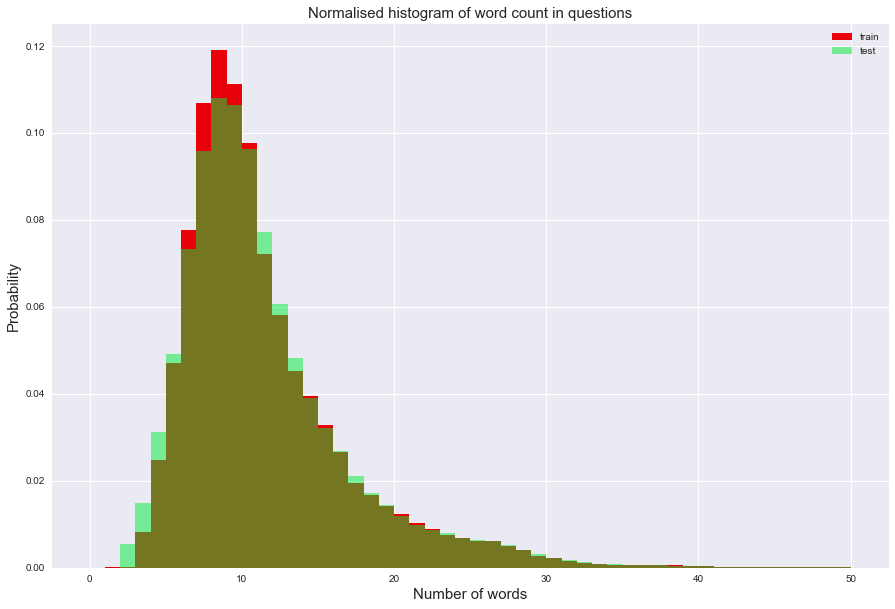

time: 8.37 s


In [13]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
printmd('# Words per Question')
print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [14]:
print len(dist_train)
dist_train.head()

808580


0    14
1     8
2    14
3    11
4    13
dtype: int64

time: 104 ms


# Semantic Analysis

In [15]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%
time: 15.3 s


## Word share

In [16]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

df_train.fillna('',inplace=True)
df_train['word_share']=df_train.apply(normalized_word_share, axis=1)


time: 20.6 s


In [17]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0.100000


time: 18 ms


In [18]:
from nltk.corpus import stopwords
df_train.fillna('',inplace=True)
stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = float(len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R


train_word_match = df_train.apply(word_match_share, axis=1 ,raw=True)


time: 30.2 s


In [19]:

print train_word_match.head(),'\n' ,len(train_word_match)

0    0.727273
1    0.307692
2    0.363636
3    0.000000
4    0.000000
dtype: float64 
404290
time: 5 ms


In [20]:

#len(obj.idf_),len(train_qs),len(obj.get_feature_names()),len(set(words))

time: 75 ms


In [21]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / float(count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

time: 31.1 s


In [22]:
print len(weights),len(words)


201105 8944593
time: 3 ms


In [23]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('kernel:', 9.998000399920016e-05),
 ('chameleons', 9.998000399920016e-05),
 ('275', 9.998000399920016e-05),
 ('276', 9.998000399920016e-05),
 ('kid:', 9.998000399920016e-05),
 ('usenet', 9.998000399920016e-05),
 ('(football', 9.998000399920016e-05),
 ('sneha', 9.998000399920016e-05),
 ('population)', 9.998000399920016e-05),
 (',delhi', 9.998000399920016e-05)]

time: 1.31 s


In [24]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

time: 14 ms


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = train_qs
#X = obj.fit_transform(corpus)



time: 103 ms


In [26]:

tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1)


time: 33.4 s


In [27]:
tfidf_train_word_match.head(),len(tfidf_train_word_match)

(0    0.772164
 1    0.361758
 2    0.355191
 3    0.000000
 4    0.000000
 dtype: float64, 404290)

time: 5 ms


In [28]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

time: 8min 55s


In [29]:
x_train.info(),x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 2 columns):
word_match          404290 non-null float64
tfidf_word_match    404270 non-null float64
dtypes: float64(2)
memory usage: 6.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 2 columns):
word_match          float64
tfidf_word_match    float64
dtypes: float64(2)
memory usage: 35.8 MB


(None, None)

time: 3.1 s


In [84]:
df_train['question1'].fillna('',inplace=True)
df_test['question1'].fillna('',inplace=True)

time: 2.16 s


In [94]:
df_test['question2']=df_test['question2'].apply(lambda l:str(l))

time: 1.1 s


In [97]:
trainqs=df_train['question1']+' '+df_train['question2']
testqs=df_test['question1']+' '+df_test['question2']

time: 6.6 s


In [89]:
x_train['wordsPerQ']=trainqs.apply(lambda x: len(x.split(' ')))
x_train['charPerQ']=trainqs.apply(len)
x_test['wordsPerQ']=testqs.apply(lambda x: len(str(x).split(' ')))
x_test['charPerQ']=testqs.apply(lambda x:len(str(x)))


time: 8.8 s


In [90]:
x_train['wordsPerQ1']=df_train['question1'].apply(lambda x: len(x.split(' ')))
x_train['wordsPerQ2']=df_train['question2'].apply(lambda x: len(x.split(' ')))
x_train['charPerQ1']=df_train['question1'].apply(len)
x_train['charPerQ2']=df_train['question2'].apply(len)


time: 1.8 s


In [92]:
x_test['wordsPerQ1']=df_test['question1'].apply(lambda x: len(x.split(' ')))
x_test['wordsPerQ2']=df_test['question2'].apply(lambda x: len(str(x).split(' ')))
x_test['charPerQ1']=df_test['question1'].apply(len)
x_test['charPerQ2']=df_test['question2'].apply(lambda x:len(str(x)))

time: 8.52 s


In [95]:
x_train['Nqmarks1'] = df_train['question1'].apply(lambda x:x.count('?') )
x_train['Nqmarks2'] = df_train['question2'].apply(lambda x:x.count('?'))
x_train['Nmath1'] = df_train['question1'].apply(lambda x: x.count('[math]'))
x_train['Nmath2'] = df_train['question2'].apply(lambda x: x.count('[math]'))
x_train['Nfullstop1'] =  df_train['question1'].apply(lambda x: x.count('.'))
x_train['Nfullstop2'] =  df_train['question2'].apply(lambda x: x.count('.'))
x_train['Ncapitals1'] =df_train['question1'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_train['Ncapitals2'] =df_train['question2'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_train['Ndigits1'] = df_train['question1'].apply(lambda x: sum(c.isdigit() for c in x))
x_train['Ndigits2'] = df_train['question2'].apply(lambda x: sum(c.isdigit() for c in x))




x_test['Nqmarks1'] = df_test['question1'].apply(lambda x:x.count('?') )
x_test['Nqmarks2'] = df_test['question2'].apply(lambda x:x.count('?'))
x_test['Nmath1'] = df_test['question1'].apply(lambda x: x.count('[math]'))
x_test['Nmath2'] = df_test['question2'].apply(lambda x: x.count('[math]'))
x_test['Nfullstop1'] =  df_test['question1'].apply(lambda x: x.count('.'))
x_test['Nfullstop2'] =  df_test['question2'].apply(lambda x: x.count('.'))
x_test['Ncapitals1'] =df_test['question1'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_test['Ncapitals2'] =df_test['question2'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_test['Ndigits1'] = df_test['question1'].apply(lambda x: sum(c.isdigit() for c in x))
x_test['Ndigits2'] = df_test['question2'].apply(lambda x: sum(c.isdigit() for c in x))

time: 1min 25s


In [98]:
x_train['qmarks'] = trainqs.apply(lambda x: 1 if '?' in x else 0)
x_train['math'] = trainqs.apply(lambda x: 1 if '[math]' in x else 0)
x_train['fullstop'] = trainqs.apply(lambda x: 1 if '.' in x else 0)
x_train['capital_first'] = trainqs.apply(lambda x: 1 if x[0].isupper() else 0)
x_train['capitals'] = trainqs.apply(lambda x: 1 if max([y.isupper() for y in x]) else 0)
x_train['numbers'] = trainqs.apply(lambda x: 1 if max([y.isdigit() for y in x])else 0)


x_test['qmarks'] = testqs.apply(lambda x: 1 if '?' in x else 0)
x_test['math'] = testqs.apply(lambda x: 1 if '[math]' in x else 0)
x_test['fullstop'] = testqs.apply(lambda x: 1 if '.' in x else 0)
x_test['capital_first'] = testqs.apply(lambda x: 1 if x[0].isupper() else 0)
x_test['capitals'] = testqs.apply(lambda x: 1 if max([y.isupper() for y in x]) else 0)
x_test['numbers'] = testqs.apply(lambda x: 1 if  max([y.isdigit() for y in x]) else 0)

time: 1min 51s


In [80]:
#x_train=x_train.replace(to_replace=True, value=1)
#x_train=x_train.replace(to_replace=False, value=0)

#x_test=x_test.replace(to_replace=True, value=1)
#x_test=x_test.replace(to_replace=False, value=0)

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B6B5908>> (for post_run_cell):


AssertionError: 

In [99]:
x_train.head(),x_test.head()

(    word_match  tfidf_word_match  wordsPerQ  charPerQ  qmarks  math  fullstop  \
 5     0.470588          0.510771         32       177       1     0         1   
 7     0.500000          0.645836         16        72       1     0         0   
 11    0.571429          0.654071         17        82       1     0         0   
 12    1.000000          1.000000         15        76       1     0         0   
 13    0.571429          0.536457         13        82       1     0         0   
 
     capital_first  capitals  numbers    ...     Nqmarks1  Nqmarks2  Nmath1  \
 5               1         1        0    ...            1         1       0   
 7               1         1        0    ...            1         1       0   
 11              1         1        0    ...            1         1       0   
 12              1         1        0    ...            1         1       0   
 13              1         1        0    ...            1         1       0   
 
     Nmath2  Nfullstop1  Nfull

time: 2.83 s


In [38]:
#train_qs.apply(lambda x: 1)#.sum()

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
808550    1
808551    1
808552    1
808553    1
808554    1
808555    1
808556    1
808557    1
808558    1
808559    1
808560    1
808561    1
808562    1
808563    1
808564    1
808565    1
808566    1
808567    1
808568    1
808569    1
808570    1
808571    1
808572    1
808573    1
808574    1
808575    1
808576    1
808577    1
808578    1
808579    1
Length: 808580, dtype: int64

time: 688 ms


In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 10 columns):
word_match          404290 non-null float64
tfidf_word_match    404270 non-null float64
wordsPerQ           404290 non-null int64
charPerQ            404290 non-null int64
qmarks              404290 non-null int64
math                404290 non-null int64
fullstop            404290 non-null int64
capital_first       404290 non-null int64
capitals            404290 non-null int64
numbers             404290 non-null int64
dtypes: float64(2), int64(8)
memory usage: 30.8 MB
time: 739 ms


In [113]:
#y_train[7000:] 

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B6B5908>> (for post_run_cell):


AssertionError: 

In [114]:
x_train[np.array(y_train) == 1.0].head()

,word_match,tfidf_word_match,wordsPerQ,charPerQ,qmarks,math,fullstop,capital_first,capitals,numbers,...,Nqmarks1,Nqmarks2,Nmath1,Nmath2,Nfullstop1,Nfullstop2,Ncapitals1,Ncapitals2,Ndigits1,Ndigits2
5,0.470588,0.510771,32,177,1,0,1,1,1,0,...,1,1,0,0,3,0,5,6,0,0
7,0.500000,0.645836,16,72,1,0,0,1,1,0,...,1,1,0,0,0,0,2,2,0,0
11,0.571429,0.654071,17,82,1,0,0,1,1,0,...,1,1,0,0,0,0,4,3,0,0
12,1.000000,1.000000,15,76,1,0,0,1,1,0,...,1,1,0,0,0,0,2,1,0,0
13,0.571429,0.536457,13,82,1,0,0,1,1,0,...,1,1,0,0,0,0,1,1,0,0


time: 4.89 s


In [115]:
pos_train = x_train[np.array(y_train) == 1]
neg_train = x_train[np.array(y_train) == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((float((len(pos_train))) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(float(len(pos_train)) / (len(pos_train) + len(neg_train)))



0.169447020773
time: 1.97 s


In [116]:
x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

time: 339 ms


In [117]:
# Finally, we split some of the data off for validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

C:\Users\sushant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



time: 2.02 s


In [118]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=20, verbose_eval=10)

[0]	train-logloss:0.682448	valid-logloss:0.682451
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.595249	valid-logloss:0.595271
[20]	train-logloss:0.533833	valid-logloss:0.53385
[30]	train-logloss:0.488663	valid-logloss:0.488676
[40]	train-logloss:0.454975	valid-logloss:0.454969
[50]	train-logloss:0.429339	valid-logloss:0.429308
[60]	train-logloss:0.409498	valid-logloss:0.409431
[70]	train-logloss:0.394181	valid-logloss:0.3941
[80]	train-logloss:0.382228	valid-logloss:0.382135
[90]	train-logloss:0.372784	valid-logloss:0.372688
[100]	train-logloss:0.3653	valid-logloss:0.365193
[110]	train-logloss:0.359371	valid-logloss:0.359257
[120]	train-logloss:0.354693	valid-logloss:0.354572
[130]	train-logloss:0.350927	valid-logloss:0.350795
[140]	train-logloss:0.34789	valid-logloss:0.347744
[150]	train-logloss:0.345472	valid-logloss:0.345314
[160]	train-logloss:0.343509	valid

In [119]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb3.csv', index=False)

time: 1min 30s


In [120]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


time: 7.37 s


In [124]:
 train_pr=bst.predict(xgb.DMatrix(x_train))

time: 9.74 s


Confusion matrix, without normalization
[[579451   5846]
 [106762  12647]]


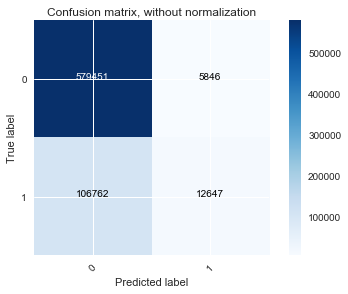

time: 8.09 s


In [127]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(np.array(y_train), np.round(train_pr,0))

#plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [130]:
print classification_report(np.array(y_train), np.round(train_pr,0))

             precision    recall  f1-score   support

        0.0       0.84      0.99      0.91    585297
        1.0       0.68      0.11      0.18    119409

avg / total       0.82      0.84      0.79    704706

time: 739 ms


Confusion matrix, without normalization
[[144831   1492]
 [ 26687   3167]]


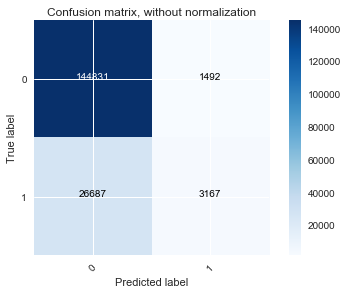

time: 5.02 s


In [129]:
cnf_matrix = confusion_matrix(np.array(y_valid), np.round(bst.predict(xgb.DMatrix(x_valid)),0))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [132]:
print classification_report(np.array(y_valid), np.round(bst.predict(xgb.DMatrix(x_valid)),0))

             precision    recall  f1-score   support

        0.0       0.84      0.99      0.91    146323
        1.0       0.68      0.11      0.18     29854

avg / total       0.82      0.84      0.79    176177

time: 2.6 s
